In [ ]:
import numpy as np

In [ ]:
text = 'You say goodbye and I say hello.'

In [ ]:
# <전처리>
# 특수문자 제거
# 문장 시작/끝 부호 표시
# 단어 소문자화

In [ ]:
text = text.lower()
text

'you say goodbye and i say hello.'

In [ ]:
text = text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [ ]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [ ]:
word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

In [ ]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [ ]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [ ]:
# 전처리 함수화
def preprocess(text):
  # 소문자화 & 끝부호 분리
  text = text.lower()
  text = text.replace('.', ' .')

  # 띄어쓰기로 분리
  words = text.split(' ')

  word_to_id = {}
  id_to_word = {}

  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word
  
  corpus = np.array([word_to_id[w] for w in words])
  
  return corpus, word_to_id, id_to_word

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [ ]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [ ]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [ ]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [ ]:
# 동시발생 행렬
def create_co_matrix(corpus, vocab_size, window_size=1): # corpus(말뭉치)에서 주변 단어이면 1, 아니면 0 부여
  corpus_size = len(corpus)

  # 비어있는 (모든 값이 0인) 행렬 선언
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  # corpus를 반복문으로 탐색
  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size+1):
      left_idx = idx - i
      right_idx = idx + i

      # 양 끝 데이터 처리 (데이터가 없는 경우)
      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1
      
      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1

  return co_matrix
        

In [ ]:
C = create_co_matrix(corpus, vocab_size=7)

In [ ]:
# 코사인 유사도 구하기
def cos_similarity(x, y, eps=1e-8):
  nx = x / (np.sqrt(np.sum(x**2)) + eps)
  ny = y / (np.sqrt(np.sum(y**2)) + eps)

  return np.dot(nx, ny) # x*y / ||x|| ||y||

In [ ]:
c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]

cos_similarity(c0,c1)

0.7071067691154799

In [ ]:
C.shape

(7, 7)

In [ ]:
def ppmi(C, eps=1e-8):
  # pmi 계산을 위한 빈 행렬 정의
  M = np.zeros_like(C, dtype=np.float64)
  N = np.sum(C) # 동시발생행렬의 합
  S = np.sum(C, axis=0) 
  total = C.shape[0] * C.shape[1]
  cnt = 0


  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i,j]*N / (S[j]*S[i]) + eps)
      M[i, j] = max(0, pmi)


  return M

In [ ]:
W = ppmi(C)

In [ ]:
print(W)

[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [ ]:
U, S, V = np.linalg.svd(W)

In [ ]:
print(U[0])

[ 3.409e-01  2.220e-16 -3.053e-16 -1.205e-01 -1.110e-16 -9.323e-01
 -4.384e-17]


In [ ]:
import matplotlib.pyplot as plt

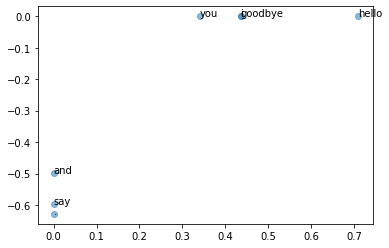

In [ ]:
for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id,1]))

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

In [ ]:
# coding: utf-8
import sys
import os
sys.path.append('..')
try:
    import urllib.request
except ImportError:
    raise ImportError('Use Python3!')
import pickle
import numpy as np


url_base = 'https://raw.githubusercontent.com/tomsercu/lstm/master/data/'
key_file = {
    'train':'ptb.train.txt',
    'test':'ptb.test.txt',
    'valid':'ptb.valid.txt'
}
save_file = {
    'train':'ptb.train.npy',
    'test':'ptb.test.npy',
    'valid':'ptb.valid.npy'
}
vocab_file = 'ptb.vocab.pkl'

dataset_dir = ''


def _download(file_name):
    file_path = dataset_dir + '/' + file_name
    if os.path.exists(file_path):
        return

    print('Downloading ' + file_name + ' ... ')

    try:
        urllib.request.urlretrieve(url_base + file_name, file_path)
    except urllib.error.URLError:
        import ssl
        ssl._create_default_https_context = ssl._create_unverified_context
        urllib.request.urlretrieve(url_base + file_name, file_path)

    print('Done')


def load_vocab():
    vocab_path = dataset_dir + '/' + vocab_file

    if os.path.exists(vocab_path):
        with open(vocab_path, 'rb') as f:
            word_to_id, id_to_word = pickle.load(f)
        return word_to_id, id_to_word

    word_to_id = {}
    id_to_word = {}
    data_type = 'train'
    file_name = key_file[data_type]
    file_path = dataset_dir + '/' + file_name

    _download(file_name)

    words = open(file_path).read().replace('\n', '<eos>').strip().split()

    for i, word in enumerate(words):
        if word not in word_to_id:
            tmp_id = len(word_to_id)
            word_to_id[word] = tmp_id
            id_to_word[tmp_id] = word

    with open(vocab_path, 'wb') as f:
        pickle.dump((word_to_id, id_to_word), f)

    return word_to_id, id_to_word


def load_data(data_type='train'):
    '''
        :param data_type: 데이터 유형: 'train' or 'test' or 'valid (val)'
        :return:
    '''
    if data_type == 'val': data_type = 'valid'
    save_path = dataset_dir + '/' + save_file[data_type]

    word_to_id, id_to_word = load_vocab()

    if os.path.exists(save_path):
        corpus = np.load(save_path)
        return corpus, word_to_id, id_to_word

    file_name = key_file[data_type]
    file_path = dataset_dir + '/' + file_name
    _download(file_name)

    words = open(file_path).read().replace('\n', '<eos>').strip().split()
    corpus = np.array([word_to_id[w] for w in words])

    np.save(save_path, corpus)
    return corpus, word_to_id, id_to_word

In [ ]:
corpus, word_to_id, id_to_word = load_data('train')

Done


In [ ]:
corpus

array([ 0,  1,  2, ..., 39, 26, 24])

In [ ]:
print('말뭉치 크기:', len(corpus))

말뭉치 크기: 929589


In [ ]:
corpus[:30]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [ ]:
for id in corpus[:30]:
  print(id_to_word[id], end=' ')

aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter <eos> pierre <unk> N years old 

In [ ]:
C = create_co_matrix(corpus, vocab_size=len(word_to_id))

In [ ]:
C.shape

(10000, 10000)

In [ ]:
C

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [ ]:
W = ppmi(C)

In [ ]:
U, S, V = np.linalg.svd(W)

CBOW 모델 실습

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)

In [ ]:
import tensorflow as tf
import numpy as np

- Training set 구성
- 모델
- 학습 코드

In [ ]:
train_set = []
for i in range(1, len(corpus)-1):
  target_id = corpus[i]
  context = [corpus[i-1], corpus[i+1]]
  train_set.append((context, target_id))

In [ ]:
train_set

[([0, 2], 1), ([1, 3], 2), ([2, 4], 3), ([3, 1], 4), ([4, 5], 1), ([1, 6], 5)]

In [ ]:
# train_set[0][0] => x
# train_set[0][1] => y

x = np.array([data[0] for data in train_set])
y = np.array([data[1] for data in train_set])

In [ ]:
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

In [ ]:
y

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size, 3, input_shape=(2,))

In [ ]:
model = tf.keras.Sequential(
    [
     embedding_layer,
     tf.keras.layers.GlobalAveragePooling1D(),
     tf.keras.layers.Dense(vocab_size, activation='softmax')
    ]
)

In [ ]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2, 3)              21        
_________________________________________________________________
global_average_pooling1d (Gl (None, 3)                 0         
_________________________________________________________________
dense (Dense)                (None, 7)                 28        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
history = model.fit(x, y, batch_size=x.shape[0])

1/1 [==============================] - 0s 3ms/step - loss: 1.9434


In [ ]:
embedding_layer(word_to_id['you'])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.043, -0.013, -0.006], dtype=float32)>

In [ ]:
embedding_layer.get_weights()

[array([[ 0.043, -0.013, -0.006],
        [-0.047,  0.008, -0.016],
        [-0.023, -0.047, -0.015],
        [-0.018, -0.037,  0.004],
        [-0.035,  0.014,  0.018],
        [-0.002,  0.03 , -0.015],
        [-0.032, -0.035, -0.038]], dtype=float32)]

skip-gram

In [ ]:
train_set = []
for i in range(1, len(corpus)-1):
  target_id = corpus[i]
  context = [corpus[i-1], corpus[i+1]]
  train_set.append((context, target_id))

In [ ]:
x = np.array([data[1] for data in train_set])
y = np.array([data[0] for data in train_set])

In [ ]:
x, y

(array([1, 2, 3, 4, 1, 5]), array([[0, 2],
        [1, 3],
        [2, 4],
        [3, 1],
        [4, 5],
        [1, 6]]))

In [ ]:
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

In [ ]:
y

array([[[1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.]],

       [[0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.]],

       [[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.]]], dtype=float32)

In [ ]:
y_ = []
for item in y:
  y_.append(np.sum(item, axis=0))

y_ = np.array(y_)

In [ ]:
model = tf.keras.Sequential(
    [
     embedding_layer,
     tf.keras.layers.GlobalAveragePooling1D(),
     tf.keras.layers.Dense(vocab_size, activation='softmax')
    ]
)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')
history = model.fit(x, y_, batch_size=x.shape[0])

1/1 [==============================] - 0s 1ms/step - loss: 0.6671


In [ ]:
embedding_layer.get_weights()

[array([[ 0.043, -0.013, -0.006],
        [-0.048,  0.007, -0.017],
        [-0.022, -0.046, -0.014],
        [-0.019, -0.038,  0.003],
        [-0.034,  0.015,  0.019],
        [-0.001,  0.029, -0.014],
        [-0.032, -0.035, -0.038]], dtype=float32)]

In [ ]:
text = 'Starbucks Corporation is an American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington. As the world largest coffeehouse chain, Starbucks is seen to be the main representation of the United States second wave of coffee culture. As of early 2020, the company operates over 30,000 locations worldwide in more than 70 countries. Starbucks locations serve hot and cold drinks, whole-bean coffee, microground instant coffee known as VIA, espresso, caffe latte, full- and loose-leaf teas including Teavana tea products, Evolution Fresh juices, Frappuccino beverages, La Boulange pastries, and snacks including items such as chips and crackers; some offerings (including their annual fall launch of the Pumpkin Spice Latte) are seasonal or specific to the locality of the store.'

In [ ]:
# 전처리 함수화
def preprocess(text):
  text = text.lower()
  text = text.replace('.', ' .')
  text = text.replace(';', ' ;')
  text = text.replace(',',' ')
  text = text.replace('(', '( ')
  text = text.replace(')', ' )')
  text = text.replace('-', ' - ')

  # 띄어쓰기로 분리
  words = text.split(' ')

  word_to_id = {}
  id_to_word = {}

  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word
  
  corpus = np.array([word_to_id[w] for w in words])
  
  return corpus, word_to_id, id_to_word

In [ ]:
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)

In [ ]:
corpus

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22,  6, 15,  0,  2, 23, 24, 25, 19, 26, 27,  7,
       19, 28, 29, 30, 31,  7, 32, 33, 17, 18,  7, 34, 35, 15, 19, 36, 37,
       38, 39, 40, 41, 42, 13, 43, 44, 45, 46, 17,  0, 41, 47, 48,  9, 49,
       50, 15, 51, 15, 52, 15, 53, 32, 15, 54, 55, 32, 56, 18, 57, 15, 58,
       15, 59, 60, 15, 61, 15, 52, 15, 15,  9, 62, 15, 52, 15, 63, 64, 65,
       66, 67, 68, 15, 69, 70, 71, 15, 72, 73, 15, 74, 75, 76, 15,  9, 77,
       65, 78, 79, 18, 80,  9, 81, 15, 15, 82, 83, 84, 85, 15, 65, 86, 87,
       88, 89,  7, 19, 90, 91, 60, 15, 92, 93, 94, 95, 96, 24, 19, 97,  7,
       19, 98, 17])

In [ ]:
word_to_id

{'': 15,
 '(': 85,
 ')': 92,
 '-': 52,
 '.': 17,
 '000': 40,
 '2020': 35,
 '30': 39,
 '70': 45,
 ';': 82,
 'american': 4,
 'an': 3,
 'and': 9,
 'annual': 87,
 'are': 93,
 'as': 18,
 'be': 25,
 'bean': 53,
 'beverages': 73,
 'boulange': 75,
 'caffe': 59,
 'chain': 6,
 'chips': 80,
 'coffee': 32,
 'coffeehouse': 22,
 'coffeehouses': 8,
 'cold': 49,
 'company': 36,
 'corporation': 1,
 'countries': 46,
 'crackers': 81,
 'culture': 33,
 'drinks': 50,
 'early': 34,
 'espresso': 58,
 'evolution': 69,
 'fall': 88,
 'frappuccino': 72,
 'fresh': 70,
 'full': 61,
 'headquartered': 12,
 'hot': 48,
 'in': 13,
 'including': 65,
 'instant': 55,
 'is': 2,
 'items': 78,
 'juices': 71,
 'known': 56,
 'la': 74,
 'largest': 21,
 'latte': 60,
 'launch': 89,
 'leaf': 63,
 'locality': 97,
 'locations': 41,
 'loose': 62,
 'main': 26,
 'microground': 54,
 'more': 43,
 'multinational': 5,
 'of': 7,
 'offerings': 84,
 'operates': 37,
 'or': 95,
 'over': 38,
 'pastries': 76,
 'products': 68,
 'pumpkin': 90,
 'rep

In [ ]:
id_to_word

{0: 'starbucks',
 1: 'corporation',
 2: 'is',
 3: 'an',
 4: 'american',
 5: 'multinational',
 6: 'chain',
 7: 'of',
 8: 'coffeehouses',
 9: 'and',
 10: 'roastery',
 11: 'reserves',
 12: 'headquartered',
 13: 'in',
 14: 'seattle',
 15: '',
 16: 'washington',
 17: '.',
 18: 'as',
 19: 'the',
 20: 'world',
 21: 'largest',
 22: 'coffeehouse',
 23: 'seen',
 24: 'to',
 25: 'be',
 26: 'main',
 27: 'representation',
 28: 'united',
 29: 'states',
 30: 'second',
 31: 'wave',
 32: 'coffee',
 33: 'culture',
 34: 'early',
 35: '2020',
 36: 'company',
 37: 'operates',
 38: 'over',
 39: '30',
 40: '000',
 41: 'locations',
 42: 'worldwide',
 43: 'more',
 44: 'than',
 45: '70',
 46: 'countries',
 47: 'serve',
 48: 'hot',
 49: 'cold',
 50: 'drinks',
 51: 'whole',
 52: '-',
 53: 'bean',
 54: 'microground',
 55: 'instant',
 56: 'known',
 57: 'via',
 58: 'espresso',
 59: 'caffe',
 60: 'latte',
 61: 'full',
 62: 'loose',
 63: 'leaf',
 64: 'teas',
 65: 'including',
 66: 'teavana',
 67: 'tea',
 68: 'products'

In [ ]:
C = create_co_matrix(corpus, vocab_size)

In [ ]:
W = ppmi(C)

In [ ]:
U, S, V = np.linalg.svd(W)

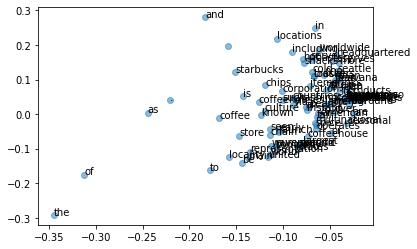

In [ ]:
for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id,1]))

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

In [ ]:
train_set = []
for i in range(1, len(corpus)-1):
  target_id = corpus[i]
  context = [corpus[i-1], corpus[i+1]]
  train_set.append((context, target_id))

In [ ]:
x = np.array([data[0] for data in train_set])
y = np.array([data[1] for data in train_set])

In [ ]:
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size, 3, input_shape=(2,))

In [ ]:
model = tf.keras.Sequential(
    [
     embedding_layer,
     tf.keras.layers.GlobalAveragePooling1D(),
     tf.keras.layers.Dense(vocab_size, activation='softmax')
    ]
)

In [ ]:
x.shape, y.shape

((154, 2), (154, 99))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
history = model.fit(x, y, batch_size=x.shape[0])

1/1 [==============================] - 0s 1ms/step - loss: 4.5948


In [ ]:
model.build()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 2, 3)              297       
_________________________________________________________________
global_average_pooling1d_5 ( (None, 3)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 99)                396       
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [ ]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
word_index = imdb.get_word_index()

In [ ]:
vocab_size = len(word_index)

In [ ]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK'] = 2
word_index['<UNUSED'] = 3

# word to id
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK is an amazing actor and now the same being director <UNK father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK to the two little boy's that played the <UNK of norman and paul they were just brilliant children are often left out of the <UNK list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what the

In [ ]:
len(train_data[0]), len(train_data[10]), len(train_data[5])

(218, 450, 43)

In [ ]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                                              value=0,
                                              padding='pre',
                                              maxlen=256)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                              value=0,
                                              padding='pre',
                                              maxlen=256)

In [ ]:
len(train_data[0]), len(train_data[10]), len(train_data[5])

(256, 256, 256)

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(vocab_size, 16, input_shape=(None, )),
     tf.keras.layers.GlobalAveragePooling1D(),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 16)          1417344   
_________________________________________________________________
global_average_pooling1d_10  (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 1,417,633
Trainable params: 1,417,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, 
          train_labels, 
          epochs=15, 
          batch_size=512, 
          validation_data=(test_data, test_labels))

Epoch 1/15
49/49 [==============================] - 1s 19ms/step - loss: 0.6895 - accuracy: 0.5834 - val_loss: 0.6838 - val_accuracy: 0.6188
Epoch 2/15
49/49 [==============================] - 1s 17ms/step - loss: 0.6714 - accuracy: 0.7170 - val_loss: 0.6568 - val_accuracy: 0.7321
Epoch 3/15
49/49 [==============================] - 1s 17ms/step - loss: 0.6286 - accuracy: 0.7737 - val_loss: 0.6044 - val_accuracy: 0.7673
Epoch 4/15
49/49 [==============================] - 1s 17ms/step - loss: 0.5614 - accuracy: 0.8104 - val_loss: 0.5354 - val_accuracy: 0.8184
Epoch 5/15
49/49 [==============================] - 1s 18ms/step - loss: 0.4857 - accuracy: 0.8444 - val_loss: 0.4684 - val_accuracy: 0.8353
Epoch 6/15
49/49 [==============================] - 1s 17ms/step - loss: 0.4183 - accuracy: 0.8632 - val_loss: 0.4157 - val_accuracy: 0.8508
Epoch 7/15
49/49 [==============================] - 1s 17ms/step - loss: 0.3661 - accuracy: 0.8758 - val_loss: 0.3787 - val_accuracy: 0.8578
Epoch 8/15
49

In [ ]:
model.evaluate(test_data, test_labels)

782/782 [==============================] - 1s 842us/step - loss: 0.2894 - accuracy: 0.8807


[0.28937476873397827, 0.8806800246238708]

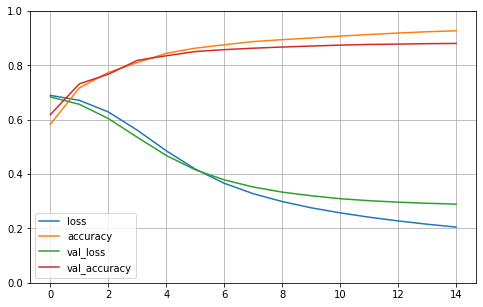

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()